Reading from the files and separating participants who completed the tasks from the rest.

In [1]:
pip install factor_analyzer

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import json
import numpy as np
import scipy.stats as stats
import statistics
from statsmodels.sandbox.stats.multicomp import multipletests
import seaborn as sns
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
from factor_analyzer.factor_analyzer import calculate_kmo
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

In [3]:
def nasa_string_to_int(nasa_string):
    sn= nasa_string.replace('[','').replace(']','').split(',')
    ntr1 = [int(y) for y in sn]
    return ntr1

In [110]:
def sak_data_to_througput(sak1, sak1t ,diflevel):
    if(len(sak1)>0):
        l= len(sak1[0].replace(" ",''))
        t= sak1t[len(sak1t)-1]-sak1t[0]
        SPC=(float(t)/diflevel)/l
        T=(1/float(SPC))*(1000/float(diflevel))*(60/5)
    else:
        T=0
        
    return T
        

In [4]:
# Opening JSON file
f = open('output2.json')

In [5]:
data = json.load(f)

In [6]:
# for x in data['data']:
#     keys = x.keys()
#     print(keys)
#     values = x.values()
#     print(values)
#     print(x['completed'])
    

In [7]:
completed_participants=[]
for x in data['data']:
    if(x['completed']):
        completed_participants.append(x['mturk_id'])
# print(completed_participants)
        

In [8]:
f = open('output1.json')

In [9]:
jsonpmodel = json.load(f)

In [10]:
# for x in data['data']:
#     keys = x.keys()
#     print(keys)
#     print('\n')
#     values = x.values()
#     print(values)

In [11]:
completed_p_models=[]
for x in jsonpmodel['data']:
#     print(x['sequence_type'])
    m=x['mturk_id']
    if(m in completed_participants):
        completed_p_models.append(x)
        

In [12]:
filename='completedparticipants.json'
with open(filename, 'w') as json_file:
    json.dump(completed_p_models, json_file, 
                        indent=4,  
                        separators=(',',': '))

In [13]:
c_file=open(filename)
c_p=json.load(c_file)

In [14]:
# for x in c_p:
#     print(x['mturk_id'])

completedparticipants.json is the file that includes data of all participants who completed the task 
and c_p is the json varible of the file



In [15]:
# ----------------Experiment Sequences---------------------------

# N : first nbackn difficulty (H/E)

# Q : first Questionaire (1: NASA-TLX and 2: MRQ)

# S : SakeDifficulty(H/E)

# _________________________________________________________________________
# seq_number/Progress | 1.n1 | 2.s | 3.q1| 4.q2|5.n2 | 6.s |7.q1 |8.q2 |
# _________________________________________________________________________
#          1          |  E   | E   |  1  |  2  |  H  |  E  |  1  |  2  |
#          2          |  E   | E   |  2  |  1  |  H  |  E  |  2  |  1  |
#          3          |  H   | E   |  1  |  2  |  E  |  E  |  1  |  2  |
#          4          |  H   | E   |  2  |  1  |  E  |  E  |  2  |  1  |
#          5          |  E   | H   |  1  |  2  |  H  |  H  |  1  |  2  |
#          6          |  E   | H   |  2  |  1  |  H  |  H  |  2  |  1  |
#          7          |  H   | H   |  1  |  2  |  E  |  H  |  1  |  2  |
#          8          |  H   | H   |  2  |  1  |  E  |  H  |  2  |  1  |
# ________________________________________________________________________


In [16]:
 #  sequence type /progress matrix 
E_n = 1; # easy nbackn
H_n = 3; # hard nbackn
E_s = 500;  # easy sak in ms
H_s = 1000; #hard sak in ms
seq_prog = [
    [E_n, E_s, 1, 2, H_n, E_s, 1, 2],
    [E_n, E_s, 2, 1, H_n, E_s, 2, 1],
    [H_n, E_s, 1, 2, E_n, E_s, 1, 2],
    [H_n, E_s, 2, 1, E_n, E_s, 2, 1],
    [E_n, H_s, 1, 2, H_n, H_s, 1, 2],
    [E_n, H_s, 2, 1, H_n, H_s, 2, 1],
    [H_n, H_s, 1, 2, E_n, H_s, 1, 2],
    [H_n, H_s, 2, 1, E_n, H_s, 2, 1]
];

conEX : Easy NBACKN----
conHX : Hard NBACKN----
conXE: Easy SAK----
conXH: Hard SAK

In [132]:
nasa_1_t_array=[]
nasa_2_t_array=[]
nasa_1_r_array=[]
nasa_2_r_array=[]

seq_type_array=[]

mrq_1_array=[]
mrq_2_array=[]

mrq_conEH_array=[]
mrq_conHH_array=[]
mrq_conEE_array=[]
mrq_conHE_array=[]

nasa_r_conEH_array=[]
nasa_r_conHH_array=[]
nasa_r_conEE_array=[]
nasa_r_conHE_array=[]

nasa_t_conEH_array=[]
nasa_t_conHH_array=[]
nasa_t_conEE_array=[]
nasa_t_conHE_array=[]

throughput1_array=[]
throughput2_array=[]


for x in c_p:
    st= x['sequence_type']
    seq_type_array.append(st)
    
    sak1= x['sak_1_actions']
    sak2= x['sak_2_actions']
    sak1t= x['sak_1_actions_t']
    sak2t= x['sak_2_actions_t']
    
    
    ntr1= nasa_string_to_int(x['nasa_1_r'][0])
    ntr2= nasa_string_to_int(x['nasa_2_r'][0])
    ntt1= nasa_string_to_int(x['nasa_1_t'][0])
    ntt2= nasa_string_to_int(x['nasa_2_t'][0])

    
    
    nasa_1_r_array.append(ntr1)
    nasa_1_t_array.append(ntt1)
    nasa_2_r_array.append(ntr2)
    nasa_2_t_array.append(ntt2)
    
    
    
    
    s=x['mrq_1'][0].replace('"','').replace('[',"").replace(']',"").split(',')
    mrq1 = [int(y) for y in s]
    mrq1.pop()
    
    
    s=x['mrq_2'][0].replace('"','').replace('[',"").replace(']',"").split(',')
    mrq2 = [int(y) for y in s]
    mrq2.pop()
    
    mrq_1_array.append(mrq1)
    mrq_2_array.append(mrq2)
    
    if(st==1 or st==2):
        mrq_conEE_array.append(mrq1)
        mrq_conHE_array.append(mrq2)
        nasa_r_conEE_array.append(ntr1)
        nasa_r_conHE_array.append(ntr2)
        nasa_t_conEE_array.append(ntt1)
        nasa_t_conHE_array.append(ntt2)
        #-------------------------------
        throughput1= sak_data_to_througput(sak1,sak1t, E_s)
        throughput2= sak_data_to_througput(sak2,sak2t, E_s)
        

       
    if(st==3 or st==4):
        mrq_conHE_array.append(mrq1)
        mrq_conEE_array.append(mrq2)
        nasa_r_conHE_array.append(ntr1)
        nasa_r_conEE_array.append(ntr2)
        nasa_t_conHE_array.append(ntt1)
        nasa_t_conEE_array.append(ntt2)
        #-------------------------------
        throughput1= sak_data_to_througput(sak1,sak1t, E_s)
        throughput2= sak_data_to_througput(sak2,sak2t, E_s)


        
    if(st==5 or st==6):
        mrq_conEH_array.append(mrq1)
        mrq_conHH_array.append(mrq2)
        nasa_r_conEH_array.append(ntr1)
        nasa_r_conHH_array.append(ntr2)
        nasa_t_conEH_array.append(ntt1)
        nasa_t_conHH_array.append(ntt2)
        #-------------------------------
        throughput1= sak_data_to_througput(sak1,sak1t, H_s)
        throughput2= sak_data_to_througput(sak2,sak2t, H_s)
        

        
        
    if(st==7 or st==8):
        mrq_conHH_array.append(mrq1)
        mrq_conEH_array.append(mrq2)
        nasa_r_conHH_array.append(ntr1)
        nasa_r_conEH_array.append(ntr2)
        nasa_t_conHH_array.append(ntt1)
        nasa_t_conEH_array.append(ntt2)
        #-------------------------------
        throughput1= sak_data_to_througput(sak1,sak1t, H_s)
        throughput2= sak_data_to_througput(sak2,sak2t, H_s)
        
    
    throughput1_array.append(throughput1)
    throughput2_array.append(throughput2)
        
        


In [130]:
throuput1_array

[2.282100959195559,
 2.90165077888863,
 4.47883320652876,
 2.2997904635355444,
 1.0221523120517435,
 1.3110296438369469,
 2.094632504207967,
 3.2031319512412137,
 1.8626825955594979,
 1.8128906063642]

In [131]:
throuput2_array

[2.7484001347254967,
 2.8360972151100956,
 3.0654081463221483,
 1.9932924128330063,
 1.2902866108869924,
 1.6989346264113547,
 0,
 3.4656129802958895,
 1.7933128308386885,
 2.2863830916526604]

<b>Starting the analysis from here:

<hr style="width:100%;text-align:left;margin-left:0">

<b>Analysis 1: Paired t-test to see effect of first task on second one 

-----------------------------------------------------------------------------------------------------------------------

<b>First Part for MRQ:</b>

r_mrq_pttest, p_mrq_pttest for each dimension separately and for r_mrq_avg,p_mrq_avg for total average as the last element.

p_mrq_pttest_adjusted is the adjusted p-values after boneferroni

In [18]:
mrqEX= mrq_conEE_array + mrq_conEH_array

In [19]:
mrqHX= mrq_conHE_array + mrq_conHH_array

In [20]:
mrqEX=np.array(mrqEX)

In [21]:
mrqHX=np.array(mrqHX)

In [22]:
r_mrq_pttest=[]
p_mrq_pttest=[]

for i in range(len(mrqHX[0])):
    r,p = stats.ttest_rel(mrqHX[:,i], mrqEX[:,i])
    r_mrq_pttest.append(r)
    p_mrq_pttest.append(p)
    
mrqHX_avg_array= np.mean(mrqHX, axis=1)
mrqEX_avg_array= np.mean(mrqEX, axis=1)
r_mrq_avg,p_mrq_avg = stats.ttest_rel(mrqHX_avg_array,mrqEX_avg_array)

r_mrq_pttest.append(r_mrq_avg)
p_mrq_pttest.append(p_mrq_avg)

In [23]:
p_mrq_pttest_adjusted = multipletests(p_mrq_pttest, alpha=0.05, method='bonferroni')

In [24]:
p_mrq_pttest_adjusted

(array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False]),
 array([1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 0.91805869, 1.        ,
        0.95111004, 0.80106367, 1.        ,        nan, 1.        ,
        1.        , 1.        , 1.        ]),
 0.002845571131556368,
 0.002777777777777778)

In [25]:
p_mrq_pttest

[0.4961015555245206,
 0.8722883630840339,
 0.34343639613791355,
 0.16785065605707492,
 0.34343639613791355,
 0.13818475535118327,
 0.811373655241246,
 0.27887299924891695,
 0.051003260706950763,
 0.16785065605707492,
 0.05283944651707043,
 0.044503537305576386,
 0.11076492156976729,
 nan,
 0.1038881310621017,
 0.27887299924891695,
 0.34343639613791355,
 0.07281555477214813]

<b>Second Part for NASA-TLX:</b>

r_nasa_pttest, p_nasa_pttest for each dimension separately and for r_nasa_avg,p_nasa_avg for total average as the last element.

p_nasa_pttest_adjusted is the adjusted p-values after boneferroni

In [26]:
nasaEX= nasa_r_conEE_array + nasa_r_conEH_array

In [27]:
nasaHX= nasa_r_conHE_array + nasa_r_conHH_array

In [28]:
nasaEX=np.array(nasaEX)

In [29]:
nasaHX=np.array(nasaHX)

In [30]:
r_nasa_pttest=[]
p_nasa_pttest=[]

for i in range(len(nasaHX[0])):
    r,p = stats.ttest_rel(nasaHX[:,i], nasaEX[:,i])
    r_nasa_pttest.append(r)
    p_nasa_pttest.append(p)
    
nasaHX_avg_array= np.mean(nasaHX, axis=1)
nasaEX_avg_array= np.mean(nasaEX, axis=1)
r_nasa_avg,p_nasa_avg = stats.ttest_rel(nasaHX_avg_array,nasaEX_avg_array)

r_nasa_pttest.append(r_nasa_avg)
p_nasa_pttest.append(p_nasa_avg)

In [31]:
p_nasa_pttest_adjusted = multipletests(p_nasa_pttest, alpha=0.05, method='bonferroni')

In [32]:
p_nasa_pttest

[0.5425520719530796,
 0.7640411601083001,
 0.3041151886808649,
 0.02729189815631593,
 0.24892626365964873,
 0.09320637160539949,
 0.19342205960333203]

In [33]:
p_nasa_pttest_adjusted

(array([False, False, False, False, False, False, False]),
 array([1.        , 1.        , 1.        , 0.19104329, 1.        ,
        0.6524446 , 1.        ]),
 0.007300831979014655,
 0.0071428571428571435)

<hr style="width:100%;text-align:left;margin-left:0">

<b> Analysis 2: two-sample t-test to see effect of one-key text entry task difficulty on questionaires

<b>First Part for MRQ:</b>

r_mrq_pttest, p_mrq_pttest for each dimension separately and for r_mrq_avg,p_mrq_avg for total average as the last element.

p_mrq_pttest_adjusted is the adjusted p-values after boneferroni

In [34]:
mrqXE= mrq_conEE_array + mrq_conHE_array

In [35]:
mrqXH= mrq_conEH_array + mrq_conHH_array

In [36]:
mrqEX=np.array(mrqXE) #just did not want the notation. do not confuse EX and XE 

In [37]:
mrqHX=np.array(mrqXH) #just did not want the notation. do not confuse EX and XE 

In [38]:
r_mrq_pttest=[]
p_mrq_pttest=[]

for i in range(len(mrqHX[0])):
    r,p = stats.ttest_ind(mrqHX[:,i], mrqEX[:,i], equal_var=True)
    r_mrq_pttest.append(r)
    p_mrq_pttest.append(p)
    
mrqHX_avg_array= np.mean(mrqHX, axis=1)
mrqEX_avg_array= np.mean(mrqEX, axis=1)
r_mrq_avg,p_mrq_avg = stats.ttest_ind(mrqHX_avg_array,mrqEX_avg_array, equal_var=True)

r_mrq_pttest.append(r_mrq_avg)
p_mrq_pttest.append(p_mrq_avg)

In [39]:
p_mrq_pttest_adjusted = multipletests(p_mrq_pttest, alpha=0.05, method='bonferroni')

In [40]:
p_mrq_pttest_adjusted

(array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False]),
 array([1.        , 1.        , 1.        , 1.        , 1.        ,
        0.62690115, 0.89819393, 0.20015485, 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        0.25067513, 1.        , 1.        ]),
 0.002845571131556368,
 0.002777777777777778)

In [41]:
p_mrq_pttest

[0.6318736384548027,
 0.9026623766357643,
 0.6409598012304204,
 0.4311073910501848,
 0.5579282415825825,
 0.034827841408376914,
 0.049899662558439035,
 0.011119714090839545,
 0.529329051766497,
 0.06972056607214441,
 0.09931472610364016,
 0.8734872283133776,
 0.6102531520664984,
 0.08558567459485754,
 0.5579282415825825,
 0.013926395886806338,
 0.6409598012304204,
 0.8840305869851582]

<b>Second Part for NASA-TLX:</b>

r_nasa_pttest, p_nasa_pttest for each dimension separately and for r_nasa_avg,p_nasa_avg for total average as the last element.

p_nasa_pttest_adjusted is the adjusted p-values after boneferroni

In [42]:
nasaXE= nasa_r_conEE_array + nasa_r_conHE_array

In [43]:
nasaXH= nasa_r_conHH_array + nasa_r_conEH_array

In [44]:
nasaEX=np.array(nasaXE) #just did not want the notation. do not confuse EX and XE 

In [45]:
nasaHX=np.array(nasaXH) #just did not want the notation. do not confuse EX and XE 

In [46]:
r_nasa_pttest=[]
p_nasa_pttest=[]

for i in range(len(nasaHX[0])):
    r,p = stats.ttest_ind(nasaHX[:,i], nasaEX[:,i], equal_var=True)
    r_nasa_pttest.append(r)
    p_nasa_pttest.append(p)
    
nasaHX_avg_array= np.mean(nasaHX, axis=1)
nasaEX_avg_array= np.mean(nasaEX, axis=1)
r_nasa_avg,p_nasa_avg = stats.ttest_ind(nasaHX_avg_array,nasaEX_avg_array, equal_var=True)

r_nasa_pttest.append(r_nasa_avg)
p_nasa_pttest.append(p_nasa_avg)

In [47]:
p_nasa_pttest_adjusted = multipletests(p_nasa_pttest, alpha=0.05, method='bonferroni')

In [48]:
p_nasa_pttest

[0.7626409476526955,
 0.45196241071737864,
 0.7223426580055808,
 0.04916357935218538,
 0.03660581627809237,
 0.47477186808710925,
 0.44429401233427646]

In [49]:
p_nasa_pttest_adjusted

(array([False, False, False, False, False, False, False]),
 array([1.        , 1.        , 1.        , 0.34414506, 0.25624071,
        1.        , 1.        ]),
 0.007300831979014655,
 0.0071428571428571435)

<hr style="width:100%;text-align:left;margin-left:0">
<hr style="width:100%;text-align:left;margin-left:0">

<b> Analysis 3: Pearson Correlation to see the correlation of two questionaires' scale

In [50]:
nasa_r_array_pc = []
nasa_r_array_pc.extend(nasa_1_r_array)
nasa_r_array_pc.extend(nasa_2_r_array)

mrq_array_pc = []
mrq_array_pc.extend(mrq_1_array)
mrq_array_pc.extend(mrq_2_array)

nasa_r_array_pc=np.array(nasa_r_array_pc)
mrq_array_pc=np.array(mrq_array_pc)

nasa_r_array_pc_avg = np.mean(nasa_r_array_pc, axis=1)
mrq_array_pc_avg = np.mean(mrq_array_pc, axis=1)

In [51]:
new_mrq_array_pc = []
new_nasa_r_array_pc = []

for ix in range(len(mrq_array_pc_avg)):
    new_mrq_array_pc.append(np.append(mrq_array_pc_avg[ix],mrq_array_pc[ix]))
    new_nasa_r_array_pc.append(np.append(nasa_r_array_pc_avg[ix],nasa_r_array_pc[ix]))

In [52]:
new_mrq_array_pc = np.array(new_mrq_array_pc)

In [53]:
new_nasa_r_array_pc = np.array(new_nasa_r_array_pc)

In [54]:
new_mrq_array_pc= np.transpose(new_mrq_array_pc)

In [55]:
new_nasa_r_array_pc=  np.transpose(new_nasa_r_array_pc)

In [56]:
c_matrix=np.zeros((len(new_nasa_r_array_pc),len(new_mrq_array_pc)))
p_matrix=np.zeros((len(new_nasa_r_array_pc),len(new_mrq_array_pc)))
for i in range(len(new_nasa_r_array_pc)):
    for j in range(len(new_mrq_array_pc)):
        c,p = stats.pearsonr(new_nasa_r_array_pc[i], new_mrq_array_pc[j])
        c_matrix[i][j]=c
        p_matrix[i][j]=p

In [57]:
rej_matrix, p_matrix_adjusted, c_b, p_b = multipletests(p_matrix.reshape(-1), alpha=0.05, method='bonferroni')
p_matrix_adjusted

array([0.09554055, 0.33027402, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.75867089, 1.        ,
       0.05759135, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.97670868, 1.        , 1.        , 1.        ,
       1.        , 0.0036648 , 0.05624591, 1.        , 1.        ,
       0.20234468, 1.        , 1.        , 1.        , 1.        ,
       0.60248827, 1.        , 1.        , 1.        , 0.00556938,
       1.        , 1.        , 1.        , 0.2951252 , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

Correllation of average values and each dimention separately-- zero indices are for averages

In [58]:
p_matrix_adjusted= np.array(p_matrix_adjusted).reshape(7,18)
rej_matrix= np.array(rej_matrix).reshape(7,18)

In [59]:
rej_matrix

array([[False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False],
       [ True, False, False, False, False, False, False, False, False,
        False, False, False, False,  True, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False]]

<AxesSubplot:>

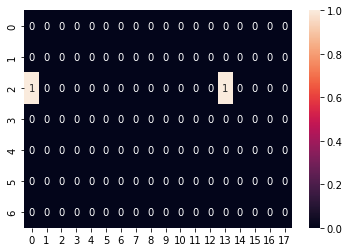

In [60]:
sns.heatmap(rej_matrix,annot=True)

In [61]:
p_matrix_adjusted

array([[0.09554055, 0.33027402, 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 0.75867089, 1.        ,
        0.05759135, 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 0.97670868, 1.        ,
        1.        , 1.        , 1.        ],
       [0.0036648 , 0.05624591, 1.        , 1.        , 0.20234468,
        1.        , 1.        , 1.        , 1.        , 0.60248827,
        1.        , 1.        , 1.        , 0.00556938, 1.        ,
        1.        , 1.        , 0.2951252 ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        ],
    

<hr style="width:100%;text-align:left;margin-left:0">
<hr style="width:100%;text-align:left;margin-left:0">

<b>ANALYSIS 4:  Factor Analysis -- Determining which scales are better predictors 
    

In [62]:
fa_array = []

for ix in range(len(mrq_array_pc)):
    fa_array.append(np.append(mrq_array_pc[ix],nasa_r_array_pc[ix]))

fa_array=np.array(fa_array)

In [63]:
chi_square_value,p_value=calculate_bartlett_sphericity(fa_array)
chi_square_value, p_value

(1733.9718133080592, 8.641629482934509e-219)

In [66]:
kmo_all,kmo_model = calculate_kmo(fa_array)

In [69]:
kmo_all,kmo_model

(array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]),
 nan)

In [75]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
#fa.analyze(fa_array, 25, rotation=None)
fa.fit(fa_array, 23)
eigen_values, vectors = fa.get_eigenvalues()
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([ 7.76711403e+00,  4.22016131e+00,  1.96600118e+00,  1.77554487e+00,
        1.46457339e+00,  1.34533537e+00,  1.04620206e+00,  8.20462622e-01,
        6.66831215e-01,  5.42460582e-01,  3.72292705e-01,  3.23563000e-01,
        2.30283530e-01,  1.97861311e-01,  1.40134762e-01,  8.62099093e-02,
        1.89263808e-02,  1.25360455e-02,  3.50573618e-03,  3.95566816e-16,
        2.68900304e-16,  5.90080260e-17, -1.83268475e-16])

In [82]:
fa = FactorAnalyzer()
fa.fit(fa_array,6)
fa.loadings_

array([[ 0.64974082,  0.1710853 ,  0.15979088],
       [ 0.35770483, -0.00463476, -0.00860211],
       [ 0.64889013, -0.06763527, -0.01175392],
       [ 0.90829504, -0.16337627, -0.14939492],
       [ 0.28300876,  0.33131936, -0.06880527],
       [ 0.28707442,  0.01501979,  0.52281827],
       [ 0.0473322 , -0.00911862,  0.56590303],
       [-0.28512313,  0.37912316,  1.06964534],
       [ 0.55598022,  0.31291423,  0.15827185],
       [ 0.15400476,  0.67200686, -0.4833451 ],
       [ 0.40526432, -0.25492894,  0.44707035],
       [ 0.17055372,  0.60466103,  0.20238646],
       [ 0.82974677,  0.00480014,  0.06258577],
       [ 0.24809614,  0.53620254, -0.60060834],
       [-0.06758754,  1.01450454,  0.20987744],
       [ 0.04777162,  0.57383694, -0.47346603],
       [ 0.57423547,  0.0601674 , -0.02657047],
       [ 0.62400164,  0.0387261 , -0.08971496],
       [ 0.79784885,  0.1642301 ,  0.22997145],
       [ 0.27830519,  0.30905601,  0.13190688],
       [-0.68068568,  0.69997777,  0.110

In [83]:
# Get variance of each factors
fa.get_factor_variance()
# Exploratory Factor Analysis To find how many factors are present in the data
# Finding how many factors are present in the data


# fa = FactorAnalyzer()
# Factors=fa.fit(fa_array)
 
# # Plotting the scree-plot
# EigenValues=Factors.get_eigenvalues()

# plt.plot(EigenValues)

(array([5.63313544, 3.93449469, 3.0471134 ]),
 array([0.24491893, 0.17106499, 0.13248319]),
 array([0.24491893, 0.41598392, 0.54846711]))

-------------------------------------------------------------------------------------------------------------------------------

<hr style="width:100%;text-align:left;margin-left:0">
<b>ANALYSIS 5: Performance vs MWL

In [180]:
mrq_t_pq = mrq_1_array + mrq_2_array
mrq_t_pq = np.array(mrq_t_pq)
mrq_t_pq_avg = mrq_t_pq.mean(axis=1)

In [181]:
nasa_r_t_pq = nasa_1_r_array+nasa_2_r_array
nasa_r_t_pq = np.array(nasa_r_t_pq)
nasa_r_t_pq_avg = nasa_r_t_pq.mean(axis=1)

In [182]:
throughput_t_pq = throughput1_array+throughput2_array
throughput_t_pq = np.array(throughput_t_pq)
throughput_t_pq[12]=0
throughput_t_pq[8]=0

In [183]:
to_delete_indices=[]
for i in range(len(throughput_t_pq)):
    if(throughput_t_pq[i]==0):
        to_delete_indices.append(i)

for j in range(len(to_delete_indices)):  
    i=len(to_delete_indices)-j-1
    throughput_t_pq=np.delete(throughput_t_pq,[i])
    nasa_r_t_pq_avg=np.delete(nasa_r_t_pq_avg,[i])
    mrq_t_pq_avg=np.delete(mrq_t_pq_avg,[i])
    nasa_r_t_pq=np.delete(nasa_r_t_pq,[i])
    mrq_t_pq=np.delete(mrq_t_pq,[i])

<b> Correlation of performance and mrq-avg

In [186]:
cmrq,pmrq = stats.pearsonr(mrq_t_pq_avg, throughput_t_pq)
print("MRQ -- C: "+str(cmrq)+" P-value: "+str(pmrq))

<b> Correlation of performance and nasa-tlx-avg

In [188]:
cnasa,pnasa = stats.pearsonr(nasa_r_t_pq_avg, throughput_t_pq)
print("NASA-TLX -- C: "+str(cnasa)+" P-value: "+str(pnasa))